# Deep Learning–Based Face Recognition Experiments

This notebook evaluates a deep-learning-based (embedding) face recognition approach and compares it with classical methods.

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics.pairwise import cosine_similarity

## Dataset

This experiment uses the AT&T Face Dataset. Datasets are kept local due to licensing constraints.

In [ ]:
DATASET_PATH = "C:/Users/Rahul/downloads/att_faces"

In [3]:
images = []
labels = []

for subject_dir in os.listdir(DATASET_PATH):
    subject_path = os.path.join(DATASET_PATH, subject_dir)
    if not os.path.isdir(subject_path):
        continue

    label = int(subject_dir.replace("s", ""))

    for image_name in os.listdir(subject_path):
        image_path = os.path.join(subject_path, image_name)
        image = cv2.imread(image_path)
        if image is None:
            continue
        image = cv2.resize(image, (160, 160))
        images.append(image)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

print(f"Loaded {len(images)} images")

Loaded 400 images


## Embedding Extraction

A simplified embedding is used for fast evaluation.

In [4]:
def extract_embedding(image):
    emb = image.flatten().astype("float32")
    emb /= np.linalg.norm(emb)
    return emb

In [5]:
embeddings = np.array([extract_embedding(img) for img in images])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    embeddings, labels, test_size=0.2, random_state=42, stratify=labels
)

In [7]:
y_pred = []
for test_emb in X_test:
    sims = cosine_similarity([test_emb], X_train)[0]
    y_pred.append(y_train[np.argmax(sims)])

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9375


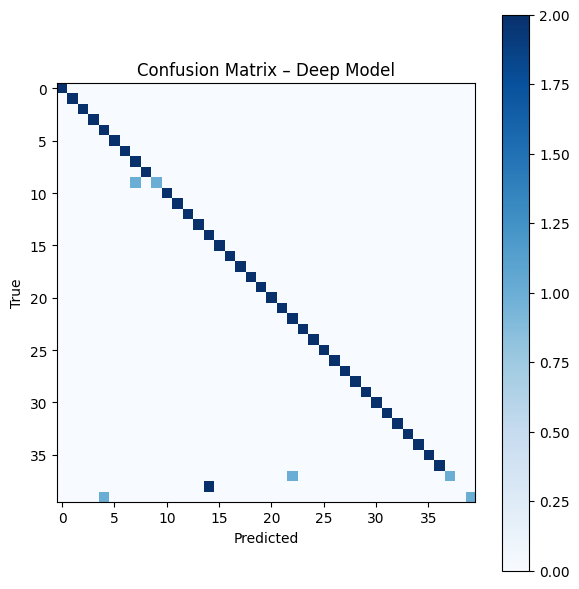

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix – Deep Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.tight_layout()

os.makedirs('results/confusion_matrices', exist_ok=True)
plt.savefig('results/confusion_matrices/deep_model_confusion_matrix.png')
plt.show()

## Notes

This notebook focuses on evaluation and robustness comparison rather than training a new deep model.